In [110]:
%matplotlib inline
from qiskit import QuantumRegister, ClassicalRegister
from qiskit import QuantumCircuit, execute, Aer
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

backend = Aer.get_backend('statevector_simulator')

def gauss_vector(n):
    g = signal.gaussian(2**n, (2**n)/12)
    g = g/np.sum(g)
    return np.sqrt(g)



Input to generator:

array([0.00078706, 0.02300125, 0.21822976, 0.67219498, 0.67219498,
       0.21822976, 0.02300125, 0.00078706])

Input distribution:

array([6.19462510e-07, 5.29057384e-04, 4.76242280e-02, 4.51846095e-01,
       4.51846095e-01, 4.76242280e-02, 5.29057384e-04, 6.19462510e-07])

Returned circuit:

OPENQASM 2.0;
include "qelib1.inc";
qreg q[3];
ry(2.5143313) q[0];
ry(3.088119) q[1];
ry(1.5612583) q[2];
cx q[2],q[0];
cx q[2],q[1];


Output distribution:

array([3.43367134e-05, 3.26414971e-04, 4.80100854e-02, 4.56398096e-01,
       4.47774221e-01, 4.71029104e-02, 3.20247193e-04, 3.36879037e-05])


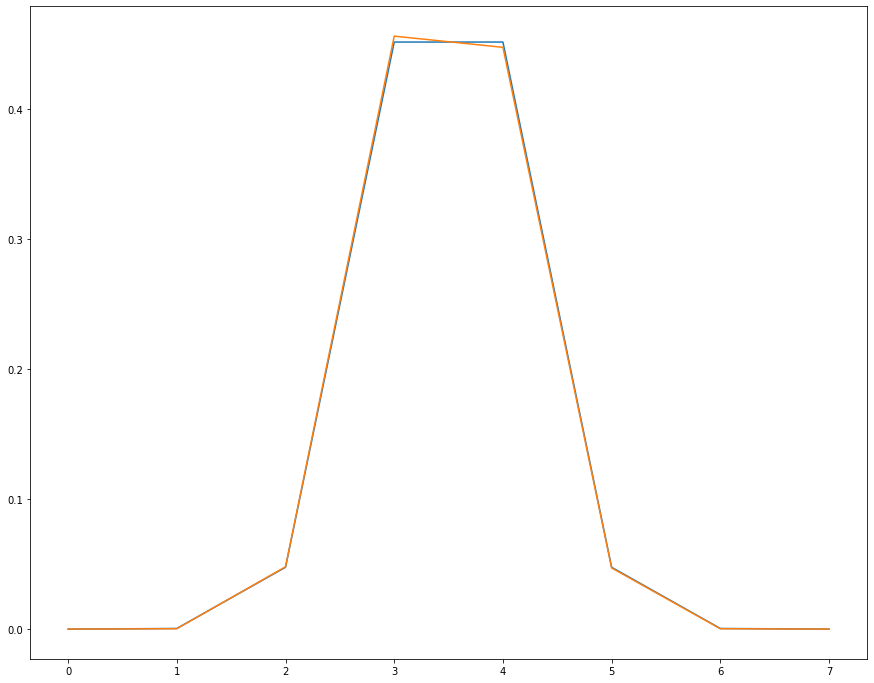

In [111]:
input_vector = gauss_vector(3)
input_dist = np.power(np.abs(input_vector), 2)

qc = QuantumCircuit()

q = QuantumRegister(3, 'q')

qc.add_register(q)

qc.ry(2.514331340789795, q[0])
qc.ry(3.088119029998779, q[1])
qc.ry(1.561258316040039, q[2])
qc.cx(q[2], q[0])
qc.cx(q[2], q[1])


job = execute(qc, backend=backend)
job_result = job.result()

output_vector = job_result.get_statevector(qc)
output_dist = np.abs(output_vector)**2

print("\nInput to generator:\n")
print(repr(input_vector))

print("\nInput distribution:\n")
print(repr(input_dist))

print("\nReturned circuit:\n")
print(qc.qasm())

print("\nOutput distribution:\n")
print(repr(output_dist))

plt.figure(figsize=(15, 12))
plt.plot(range(len(input_dist)), input_dist)
plt.plot(range(len(output_dist)), output_dist)
plt.show()



Input to generator:

array([2.00746718e-04, 1.43769154e-03, 7.77208701e-03, 3.17149674e-02,
       9.76889769e-02, 2.27133676e-01, 3.98632016e-01, 5.28101620e-01,
       5.28101620e-01, 3.98632016e-01, 2.27133676e-01, 9.76889769e-02,
       3.17149674e-02, 7.77208701e-03, 1.43769154e-03, 2.00746718e-04])

Input distribution:

array([4.02992449e-08, 2.06695695e-06, 6.04053365e-05, 1.00583916e-03,
       9.54313621e-03, 5.15897069e-02, 1.58907484e-01, 2.78891321e-01,
       2.78891321e-01, 1.58907484e-01, 5.15897069e-02, 9.54313621e-03,
       1.00583916e-03, 6.04053365e-05, 2.06695695e-06, 4.02992449e-08])

Returned circuit:

OPENQASM 2.0;
include "qelib1.inc";
qreg q[4];
ry(1.5816396) q[0];
ry(2.4284148) q[1];
ry(1.2329319) q[2];
ry(3.0660872) q[3];
cx q[0],q[2];
cx q[2],q[3];
cx q[3],q[1];


Output distribution:

array([5.71579589e-05, 2.93279575e-05, 4.11900914e-04, 2.11347864e-04,
       2.01165883e-02, 4.09436323e-02, 1.44967408e-01, 2.95054616e-01,
       2.88724634e-01, 1.481456

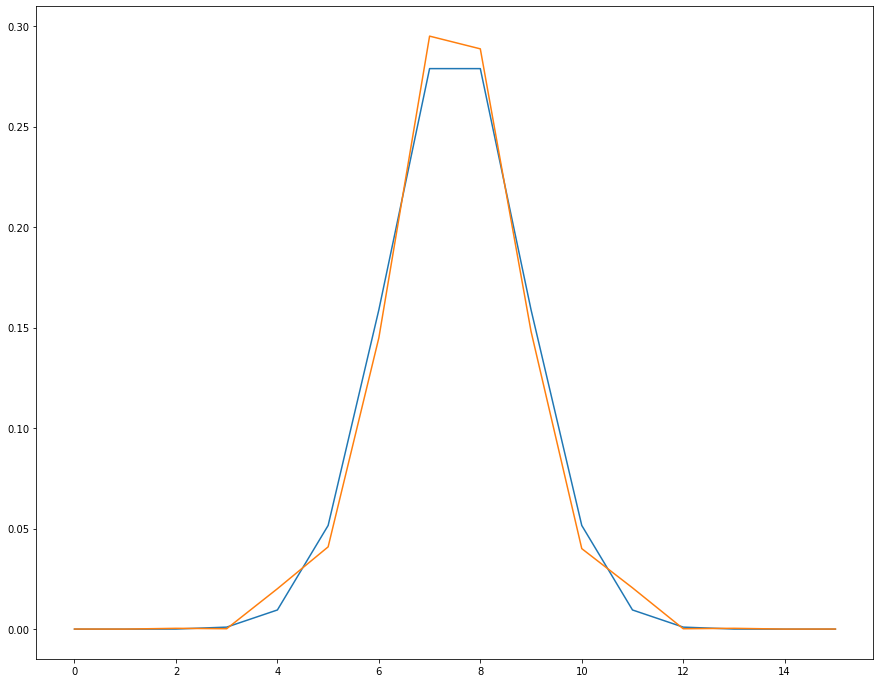

In [112]:
input_vector = gauss_vector(4)
input_dist = np.power(np.abs(input_vector), 2)

qc = QuantumCircuit()

q = QuantumRegister(4, 'q')

qc.add_register(q)

qc.ry(1.581639647483826, q[0])
qc.ry(2.428414821624756, q[1])
qc.ry(1.232931852340698, q[2])
qc.ry(3.066087245941162, q[3])
qc.cx(q[0], q[2])
qc.cx(q[2], q[3])
qc.cx(q[3], q[1])


job = execute(qc, backend=backend)
job_result = job.result()

output_vector = job_result.get_statevector(qc)
output_dist = np.abs(output_vector)**2

print("\nInput to generator:\n")
print(repr(input_vector))

print("\nInput distribution:\n")
print(repr(input_dist))

print("\nReturned circuit:\n")
print(qc.qasm())

print("\nOutput distribution:\n")
print(repr(output_dist))

plt.figure(figsize=(15, 12))
plt.plot(range(len(input_dist)), input_dist)
plt.plot(range(len(output_dist)), output_dist)
plt.show()



Input to generator:

array([8.30412609e-05, 2.38417921e-04, 6.38039442e-04, 1.59154831e-03,
       3.70046070e-03, 8.01965035e-03, 1.62001390e-02, 3.05032222e-02,
       5.35348222e-02, 8.75771242e-02, 1.33539167e-01, 1.89797426e-01,
       2.51440737e-01, 3.10487867e-01, 3.57369344e-01, 3.83401339e-01,
       3.83401339e-01, 3.57369344e-01, 3.10487867e-01, 2.51440737e-01,
       1.89797426e-01, 1.33539167e-01, 8.75771242e-02, 5.35348222e-02,
       3.05032222e-02, 1.62001390e-02, 8.01965035e-03, 3.70046070e-03,
       1.59154831e-03, 6.38039442e-04, 2.38417921e-04, 8.30412609e-05])

Input distribution:

array([6.89585101e-09, 5.68431049e-08, 4.07094330e-07, 2.53302603e-06,
       1.36934094e-05, 6.43147918e-05, 2.62444505e-04, 9.30446565e-04,
       2.86597719e-03, 7.66975268e-03, 1.78327093e-02, 3.60230629e-02,
       6.32224443e-02, 9.64027154e-02, 1.27712848e-01, 1.46996587e-01,
       1.46996587e-01, 1.27712848e-01, 9.64027154e-02, 6.32224443e-02,
       3.60230629e-02, 1.7832709

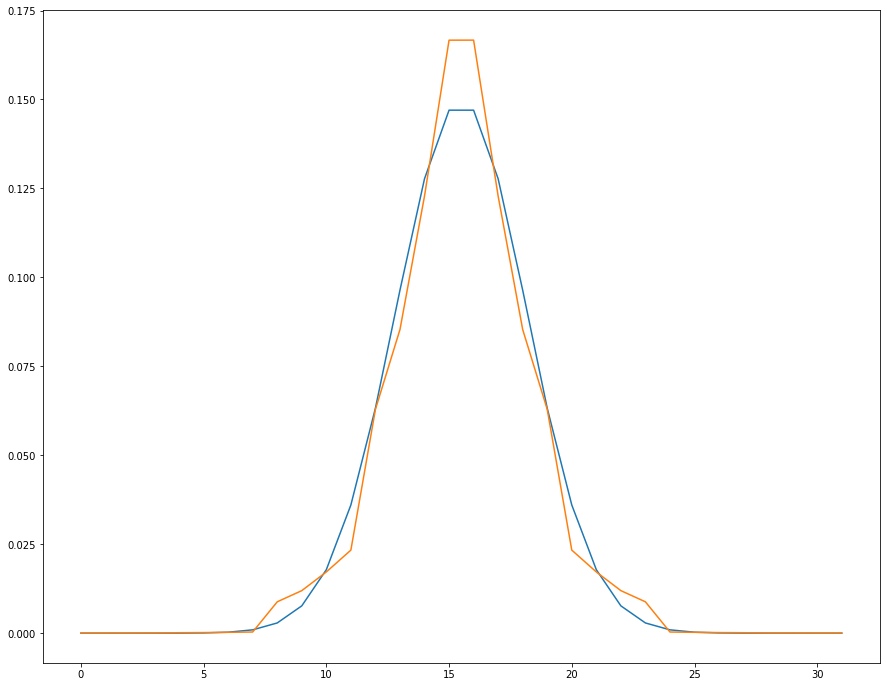

In [122]:
input_vector = gauss_vector(5)
input_dist = np.power(np.abs(input_vector), 2)

qc = QuantumCircuit()

q = QuantumRegister(5, 'q')

qc.add_register(q)

qc.ry(1.7227672338, q[0]);
qc.ry(1.8994616270, q[1]);
qc.ry(2.4254486561, q[2]);
qc.ry(3.0540740490, q[3]);
qc.ry(1.5708292723, q[4]);
qc.cx(q[4], q[0])
qc.cx(q[4], q[1])
qc.cx(q[4], q[2])
qc.cx(q[4], q[3])

job = execute(qc, backend=backend)
job_result = job.result()

output_vector = job_result.get_statevector(qc)
output_dist = np.abs(output_vector)**2

print("\nInput to generator:\n")
print(repr(input_vector))

print("\nInput distribution:\n")
print(repr(input_dist))

print("\nReturned circuit:\n")
print(qc.qasm())

print("\nOutput distribution:\n")
print(repr(output_dist))

plt.figure(figsize=(15, 12))
plt.plot(range(len(input_dist)), input_dist)
plt.plot(range(len(output_dist)), output_dist)
plt.show()
